# Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with 'Implementation' in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with 'Optional' in the header.
In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a 'Question' header. Carefully read each question and provide thorough answers in the following text boxes that begin with 'Answer:'. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.


In [2]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data

training_file = "./train.p"
validation_file= "./valid.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 512
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)
dropout = 0.90 # Dropout, probability to keep units

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

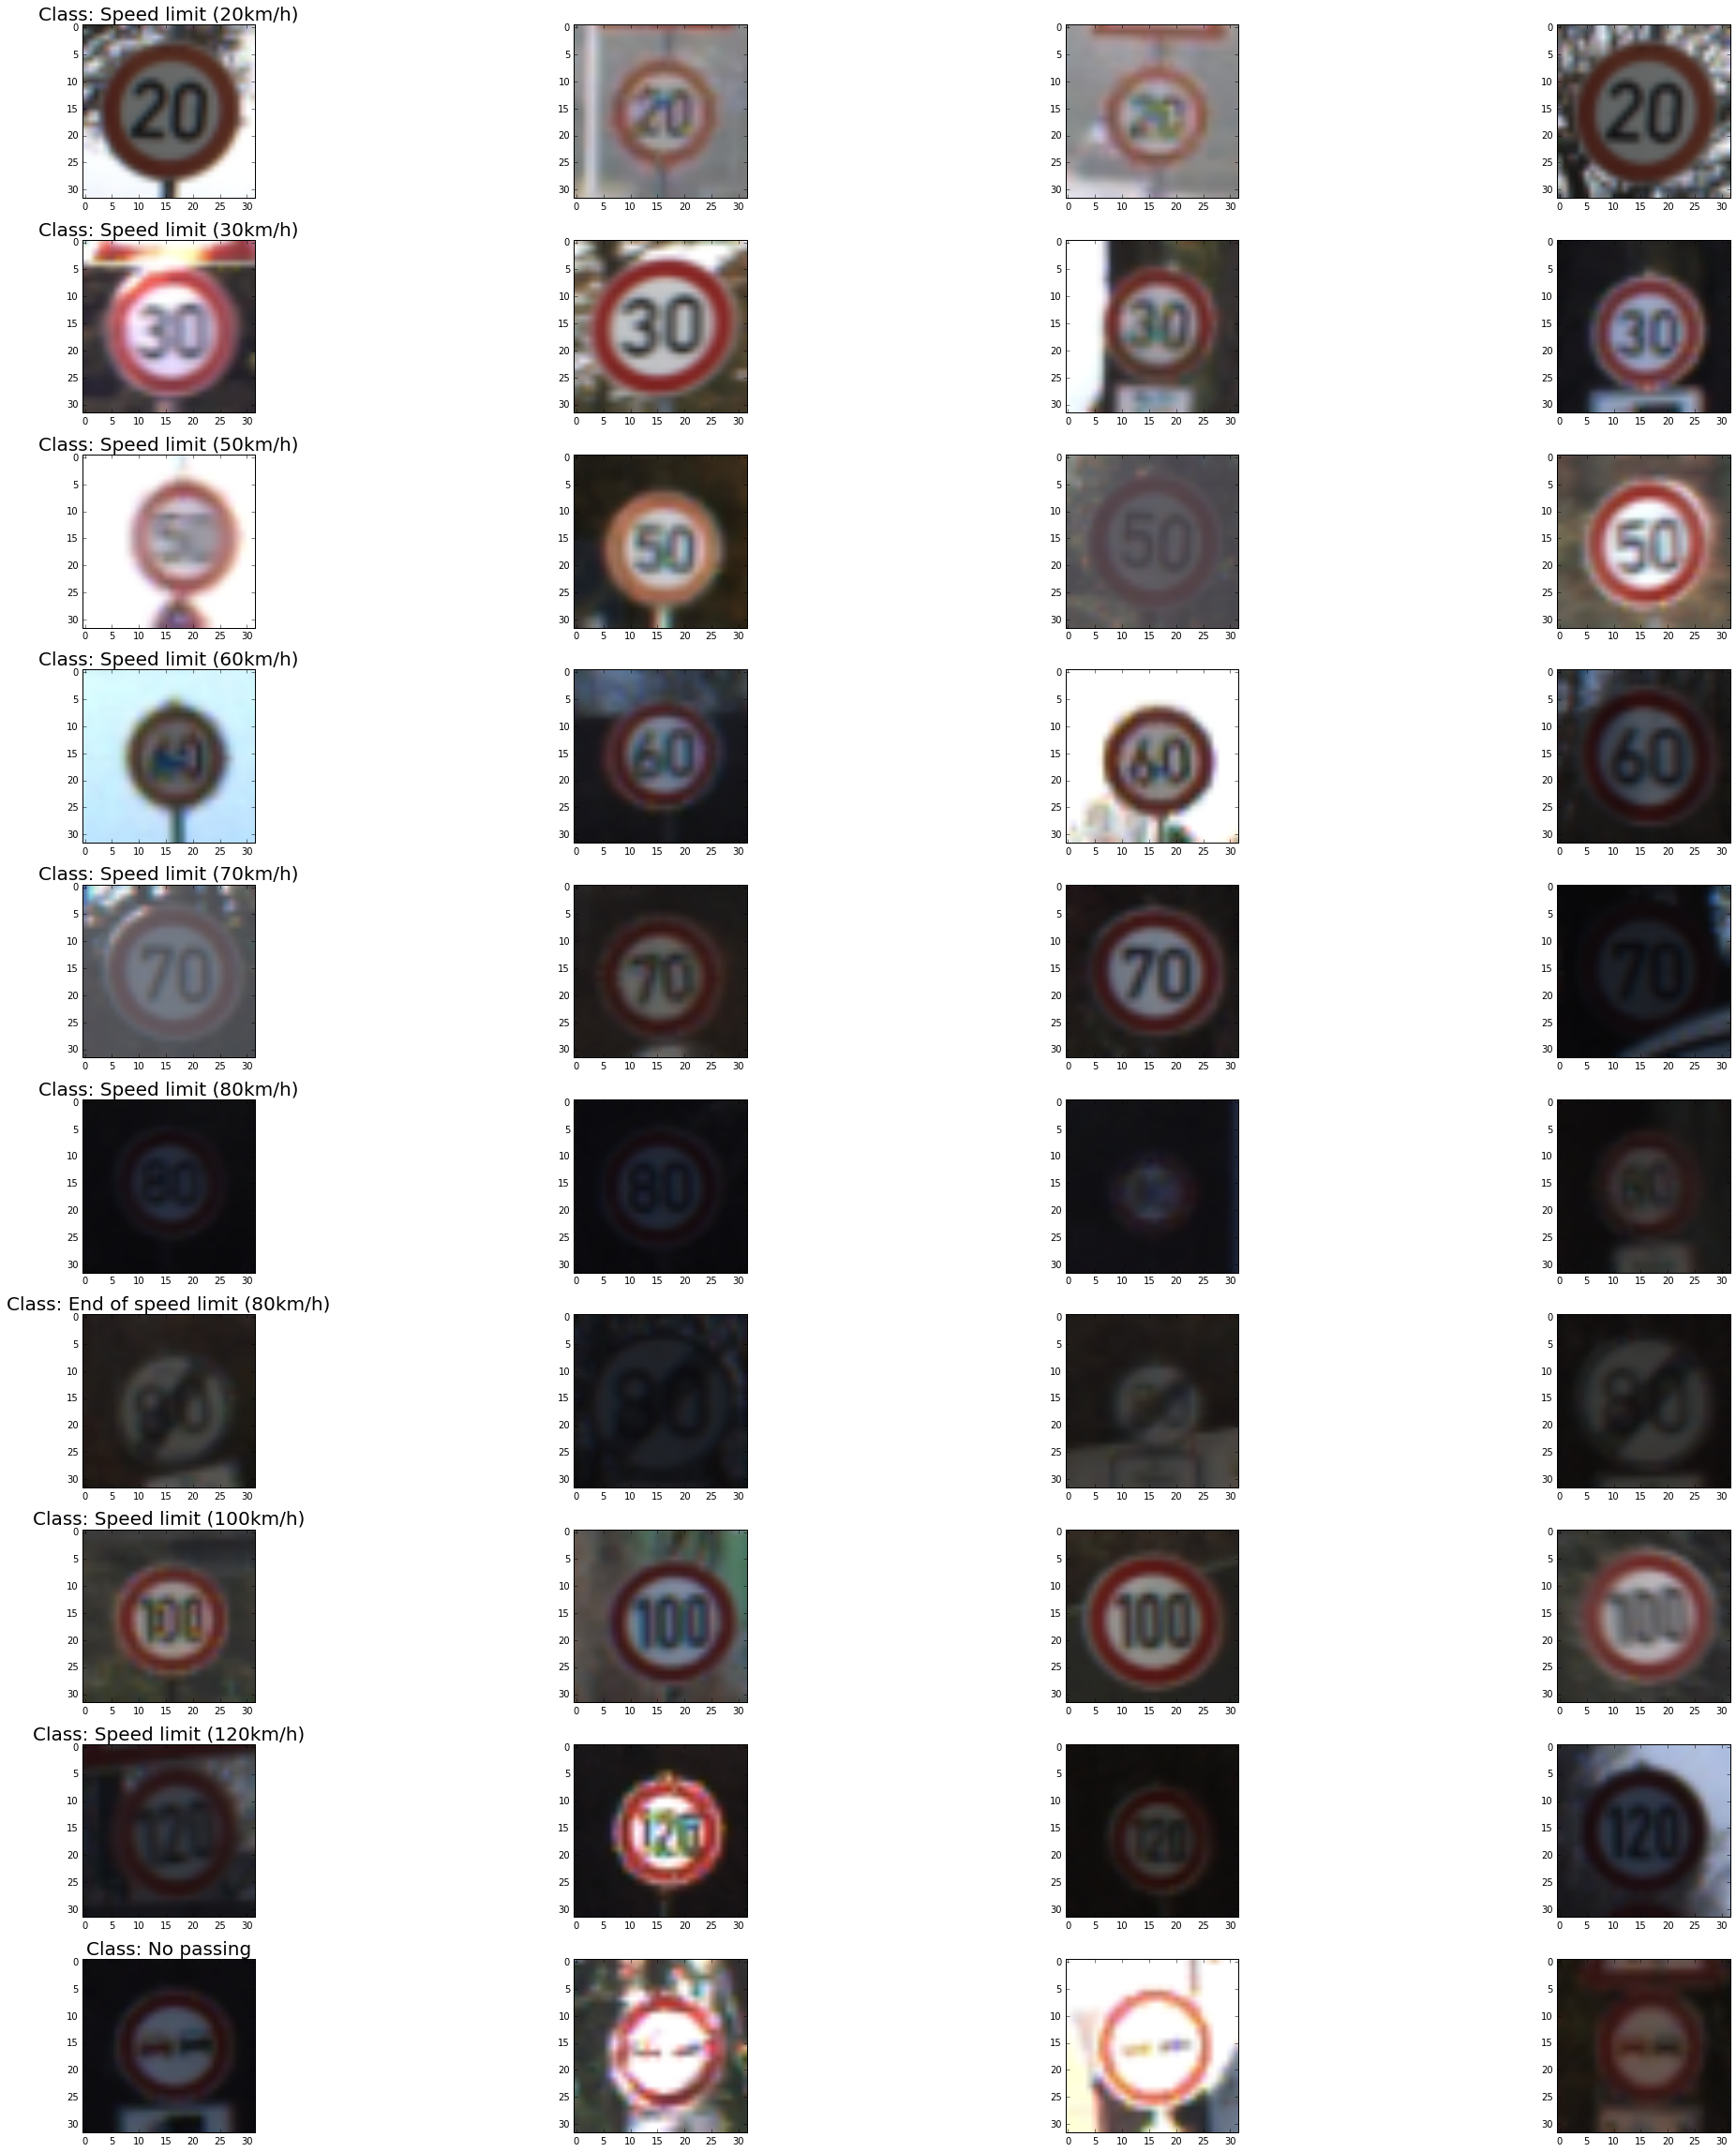

In [4]:
# Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

import pandas as pd
import csv

sign_name_dict = {}
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader)
    for rows in reader:
        k = int(rows[0])
        v = str(*rows[1:])
        sign_name_dict[k] = v

sign_dict = {}

for i in range(n_train):
    if y_train[i] not in sign_dict:
        sign_dict[y_train[i]] = []
        sign_dict[y_train[i]].append(X_train[i])
    else:
        sign_dict[y_train[i]].append(X_train[i])

f, axarr = plt.subplots(10, 4, figsize = (32,32))
plt.subplots_adjust(wspace=0, hspace=0.5)

for i in range(int(n_classes/4)):
    axarr[i,0].set_title("Class: " + str(sign_name_dict[i]), fontsize=20, ha='center')
    k = min(4, len(sign_dict[i]))
    for j in range(k):
        axarr[i,j].imshow(sign_dict[i][j])

plt.tight_layout()
plt.show()

## Sampling few more images

### Variations of signs of same type are due to:

- Lighting conditions
- Brightness
- Angle or position
- Sharpness
- Size
- Color

#### It will be interesting to look at the distribution of the signs and look for imbalanced classes


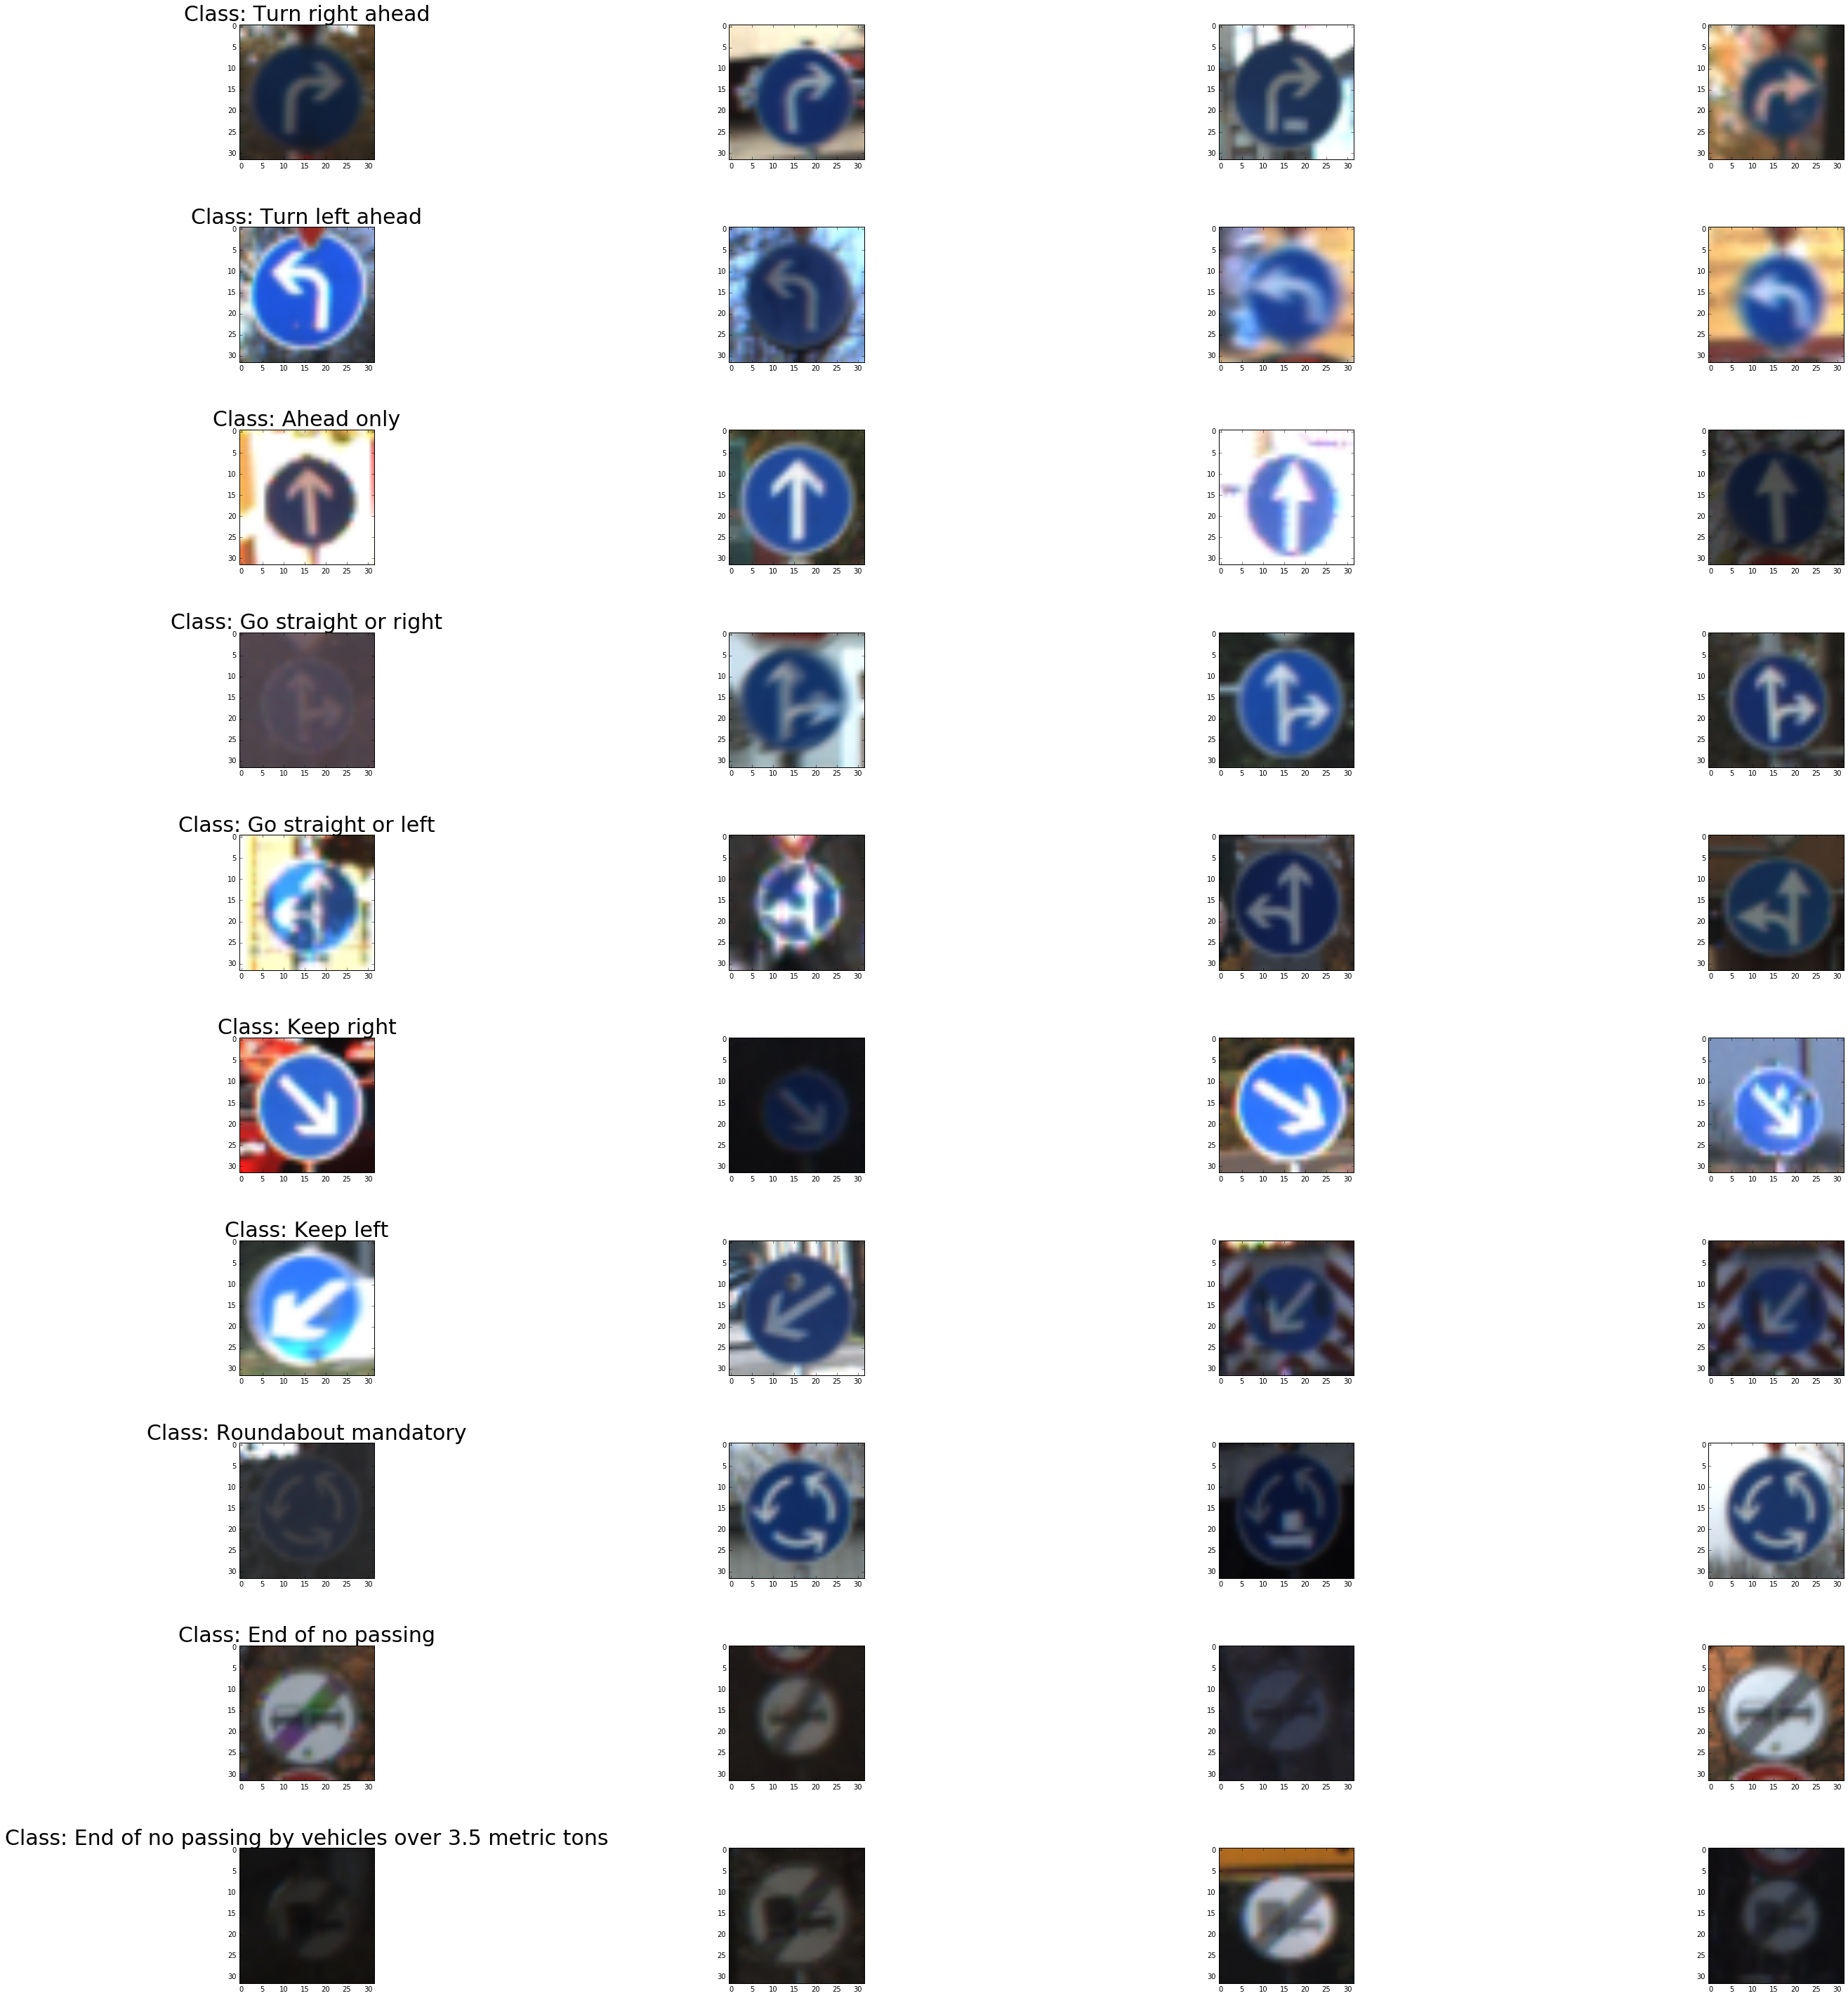

In [5]:
f, axarr = plt.subplots(10, 4, figsize = (50,50))
plt.subplots_adjust(wspace=0, hspace=0.5)

for i in range(int(n_classes-10), int(n_classes)):
    axarr[i-n_classes+10,0].set_title("Class: " + str(sign_name_dict[i]), fontsize=30, ha='center')
    k = min(4, len(sign_dict[i]))
    for j in range(k):
        axarr[i-n_classes+10,j-k].imshow(sign_dict[i][j])

## Traffic Sign Distribution


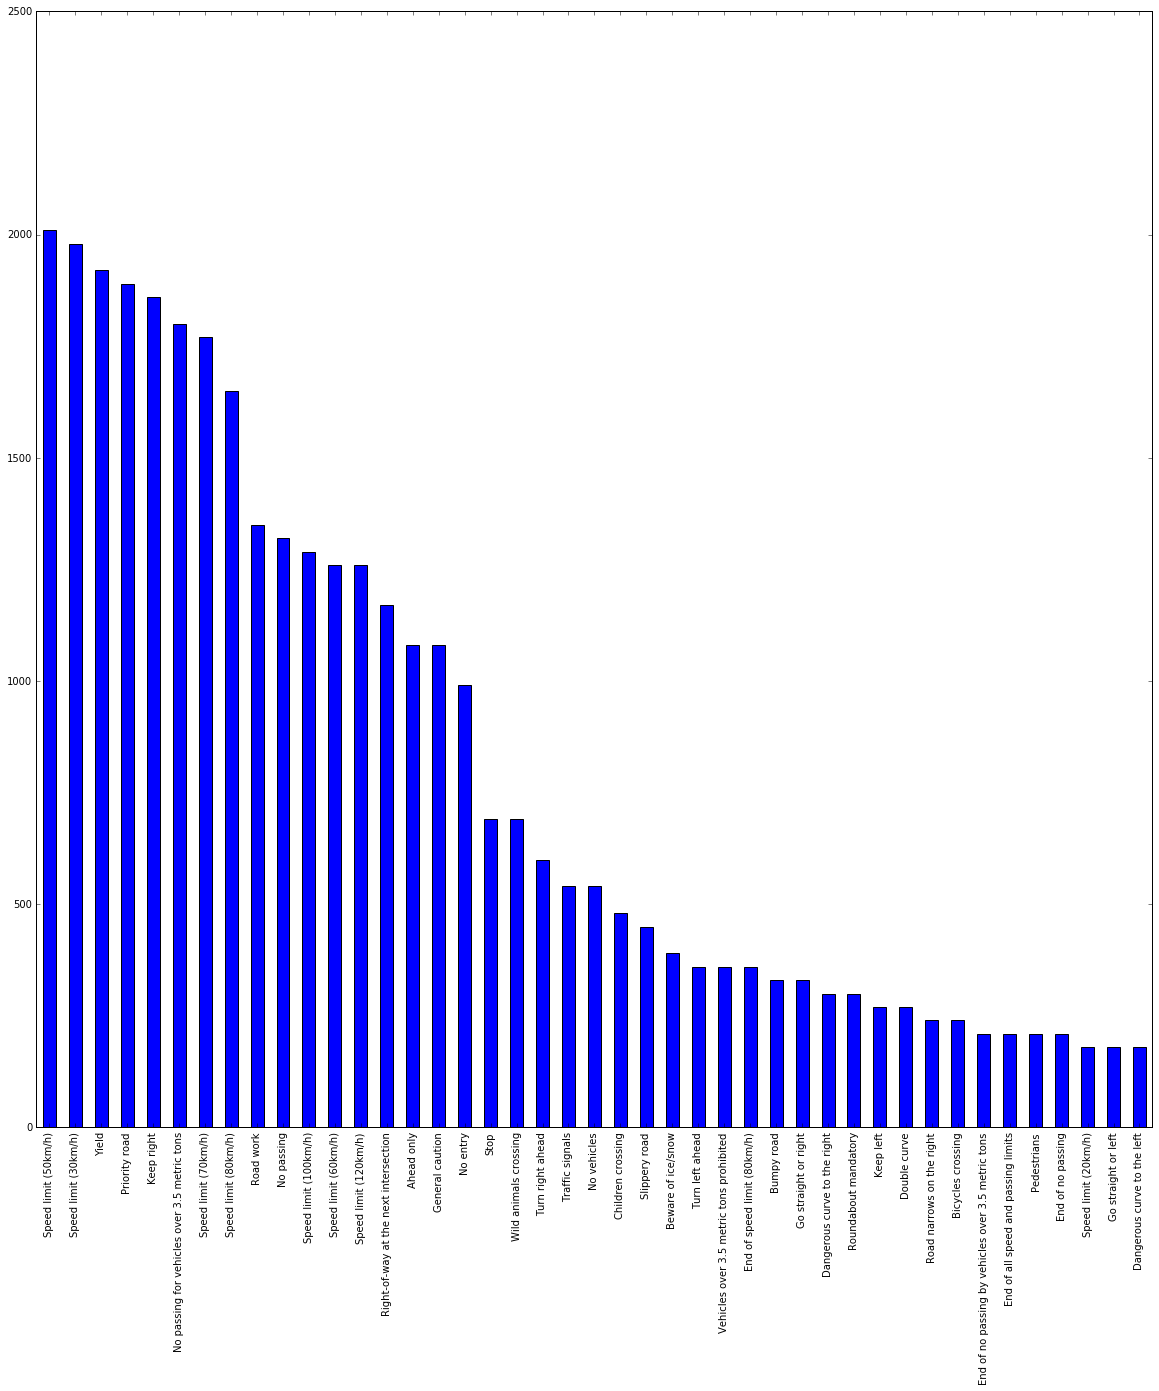

In [6]:
            
sign_train = pd.DataFrame(y_train, columns = ['ClassId'])
sign_train['SignName'] = 'UNKNOWN'
sign_train['ClassId'] = sign_train['ClassId']
sign_train['SignName'] = sign_train['ClassId'].map(sign_name_dict)
#plt.figure(num=None, figsize=(480,480), dpi=80, facecolor='w', edgecolor='k')

sign_train['SignName'].value_counts().plot(kind='bar', figsize = (20,20))

## Top 10

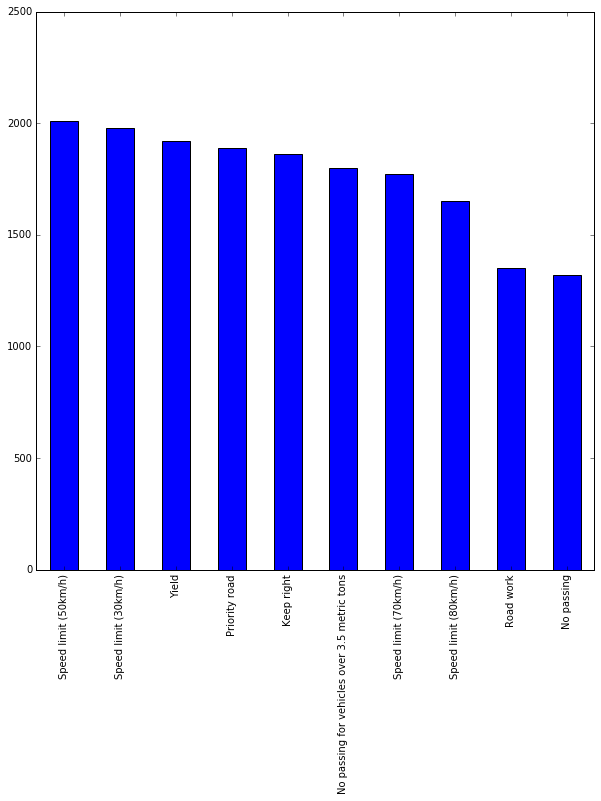

In [7]:
sign_train['SignName'].value_counts().nlargest(10).plot(kind='bar', figsize = (10,10))

## Bottom 10

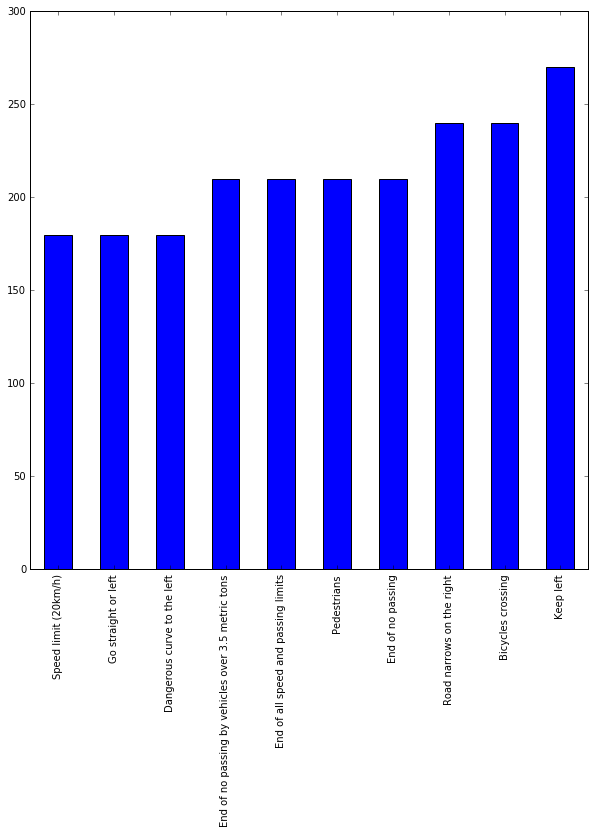

In [9]:
sign_train['SignName'].value_counts().nsmallest(10).plot(kind='bar', figsize = (10,10))

In [10]:
sign_train['SignName'].value_counts().describe()

count      43.000000
mean      809.279070
std       626.750855
min       180.000000
25%       285.000000
50%       540.000000
75%      1275.000000
max      2010.000000
Name: SignName, dtype: float64

## Data Augmentation

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

AUGMENT_LENGTH = 400

def augment_data(img, label, y_train, image_list):
        
    # Add 400 new transformed images for this class
    for k in range(AUGMENT_LENGTH):
        img = transform(img)
        image_list.append(img)
        y_train = np.append(y_train, label)
    
    return y_train
        
def equalize(img):
    equated = img.copy() 
    equated[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    equated[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    equated[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    #plt.figure()
    #plt.imshow(equated)
    return equated

def translate_image(img):
    
    rows,cols,channel = img.shape
    tx =  np.random.randint(-5, 5)
    ty =  np.random.randint(-5, 5)

    M = np.float32([[1,0,tx],[0,1,ty]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    #plt.figure()
    #plt.imshow(dst)
    return img

def rotate_image(img, angle = 0):
    rows,cols,channel = img.shape
    theta = 15
    angle = np.random.randint(-theta, theta)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    #plt.figure()
    #plt.imshow(dst)
    return dst

def increase_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels
    l2 = clahe.apply(l)  # apply CLAHE to the L-channel
    lab = cv2.merge((l2,a,b))  # merge channels
    img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
    #plt.figure()
    #plt.imshow(img2)
    return img2

def transform(img):
    transforms = [translate_image, rotate_image, equalize, increase_contrast]
    idx1 = np.random.randint(0, 2)
    idx2 = np.random.randint(2, 4)
    trans_index = shuffle([idx1, idx2])
    for idx in trans_index:
        img = transforms[idx](img)
    return img
    
val_count = sign_train.ClassId.value_counts()
class_id_list = list(sign_train.ClassId.value_counts().reset_index(name="count").query("count < 1000")["index"])

augment_file = "data.pkl"

file = open(augment_file, "wb")

class_processed_list = []
low_cardinal_image_dict = {}

for i in range(n_train):
    if (y_train[i] in class_id_list) and (y_train[i] not in class_processed_list):
        class_processed_list.append(y_train[i])
        low_cardinal_image_dict[y_train[i]] = X_train[i]

image_list = []
for im_key in low_cardinal_image_dict.keys():
    y_train = augment_data(low_cardinal_image_dict[im_key], im_key, y_train, image_list)

X_augmented = np.array([img for img in image_list])
X_train = np.concatenate((X_train, X_augmented), axis = 0)

print("X_augmented.shape = " + str(X_augmented.shape))
print("X.shape = " + str(X_train.shape))
print("y_train.shape = " + str(y_train.shape))

X_augmented.shape = (10800, 32, 32, 3)
X.shape = (45599, 32, 32, 3)
y_train.shape = (45599,)


## Augmented Images

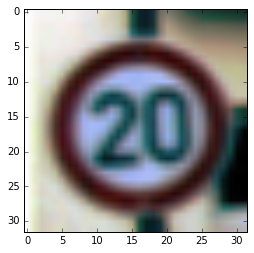

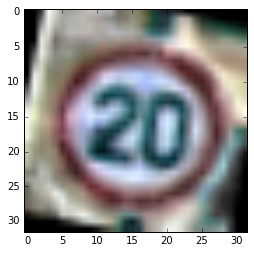

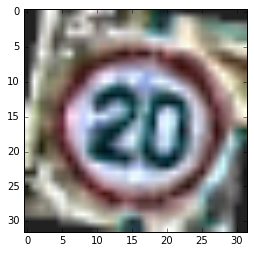

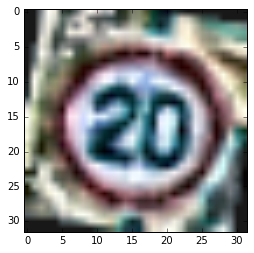

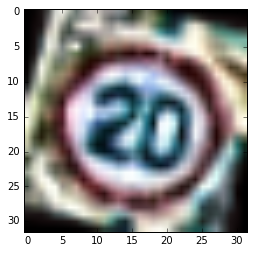

In [42]:
for i in range(5):
    plt.figure()
    plt.imshow(X_augmented[i])

plt.show()

In [15]:
# Reset to original dataset
X_train = train['features']
y_train = train['labels']
n_train = len(y_train)

34799

## Data Distribution after Augmentation

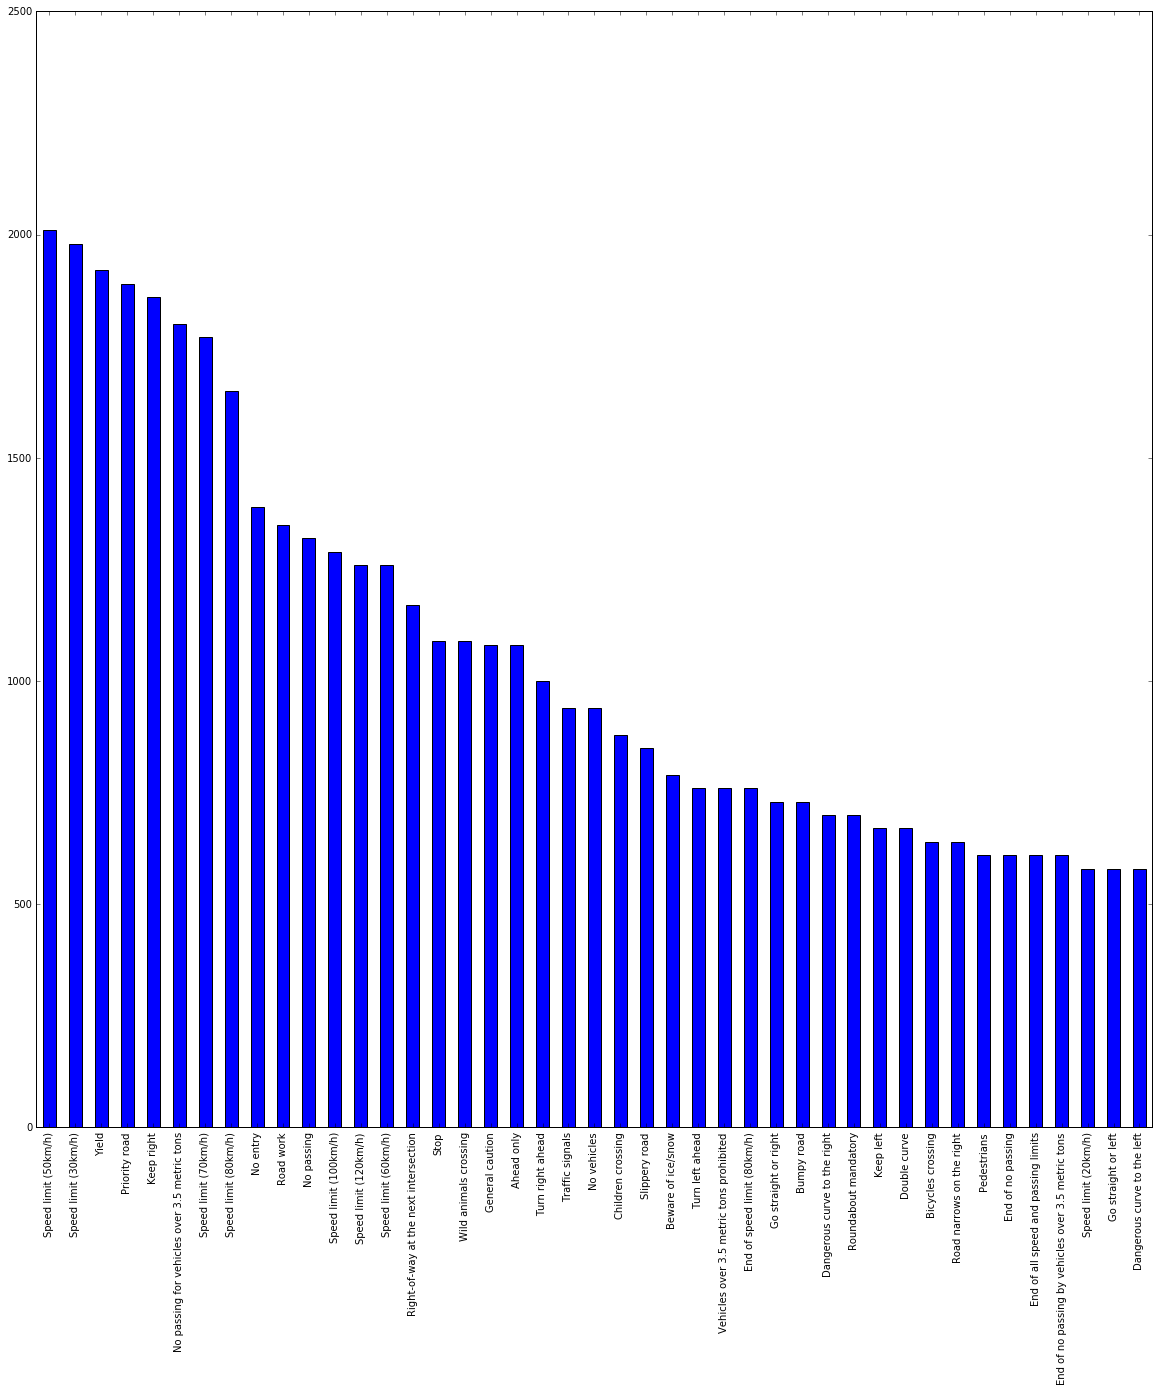

In [14]:
sign_train = pd.DataFrame(y_train, columns = ['ClassId'])
sign_train['SignName'] = 'UNKNOWN'
sign_train['ClassId'] = sign_train['ClassId']
sign_train['SignName'] = sign_train['ClassId'].map(sign_name_dict)
#plt.figure(num=None, figsize=(480,480), dpi=80, facecolor='w', edgecolor='k')

sign_train['SignName'].value_counts().plot(kind='bar', figsize = (20,20))
n_train = len(y_train)

## Data Preprocessing

In [16]:
import cv2
import numpy as np

def process_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image
   
def normalize_image(image):    
    a = -5.0
    b = 5.0
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
    return image

def normalize_image2(image):
    image = image/255
    return image

X_train_gray = np.zeros((n_train, 32, 32, 1))
X_valid_gray = np.zeros((n_validation, 32, 32, 1))
X_test_gray =  np.zeros((n_test, 32, 32, 1))

X_train_gray1 = np.zeros((n_train, 32, 32, 1))
X_valid_gray1 = np.zeros((n_validation, 32, 32, 1))
X_test_gray1 =  np.zeros((n_test, 32, 32, 1))

for i in range(n_train):
    X_train_gray[i, :, :, 0] = process_image(X_train[i].squeeze())
    X_train_gray1[i, :, :, 0] = normalize_image2(X_train_gray[i, :, :, 0])

for i in range(n_validation):
    X_valid_gray[i, :, :, 0] = process_image(X_valid[i].squeeze())
    X_valid_gray1[i, :, :, 0] = normalize_image2(X_valid_gray[i, :, :, 0])
    
for i in range(n_test):
    X_test_gray[i, :, :, 0] = process_image(X_test[i].squeeze())
    X_test_gray1[i, :, :, 0] = normalize_image2(X_test_gray[i, :, :, 0])
    
print("X_train_gray shape = " + str(X_train_gray1.shape))
print("X_valid_gray shape = " + str(X_valid_gray1.shape))
print("X_test_gray shape = " + str(X_test_gray1.shape))

X_train_gray shape = (34799, 32, 32, 1)
X_valid_gray shape = (4410, 32, 32, 1)
X_test_gray shape = (12630, 32, 32, 1)


In [17]:
from sklearn.utils import shuffle

X_train_gray1, y_train = shuffle(X_train_gray1, y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Model Architecture

In [42]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x64.
    
    W = tf.Variable(tf.truncated_normal(shape = (5,5,3,64), mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(64))
    x = tf.nn.conv2d(x, W, strides = [1, 1, 1, 1], padding = 'VALID')
    x = tf.nn.bias_add(x, b)
    
    
    # Activation.
    x = tf.nn.relu(x)

    # Pooling. Input = 28x28x64. Output = 14x14x64.
    x = tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    

    # Layer 2: Convolutional. Output = 10x10x128.
    W = tf.Variable(tf.truncated_normal(shape = (5, 5, 64, 128), mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(128))
    x = tf.nn.conv2d(x, W, strides = [1, 1, 1, 1], padding = 'VALID')
    x = tf.nn.bias_add(x, b)
    
    
    # Activation.
    x = tf.nn.relu(x)                 

    # Pooling. Input = 10x10x128. Output = 5x5x64.
    x = tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')

    # TFlatten. Input = 5x5x128. Output = 400.
    x = flatten(x)
    
    # Layer 3: Fully Connected. Input = 3200. Output = 400.
    W = tf.Variable(tf.truncated_normal(shape = (3200, 800), mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(800))
    x = tf.add(tf.matmul(x, W), b)
    
    # Activation.
    x = tf.nn.relu(x)

    # Layer 4: Fully Connected. Input = 800. Output = 400.
    W = tf.Variable(tf.truncated_normal(shape = (800, 400), mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(400))
    x = tf.add(tf.matmul(x, W), b)
    
    # Activation.
    x = tf.nn.relu(x)
    
    x = tf.nn.dropout(x, dropout)
                    

    # Layer 5: Fully Connected. Input = 400. Output = 43.
    W = tf.Variable(tf.truncated_normal(shape = (400, 43), mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(x, W), b)
    
    return logits

In [77]:
EPOCHS = 30
BATCH_SIZE = 128

def LeNet1(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, dropout)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    conv2 = tf.nn.dropout(conv2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

In [18]:
from tensorflow.contrib.layers import flatten

EPOCHS = 30
BATCH_SIZE = 128
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)
dropout = 0.8  # Dropout, probability to keep units


def LeNet2(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling.
    conv2 = tf.nn.dropout(conv2, dropout)
    #conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 3: Convolutional. Output = 10x10x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(2, 2, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 10x10x128. Output = 5x5x128.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3 = tf.nn.dropout(conv3, dropout)

    # Flatten. Input = 5x5x128. Output = 1024.
    fc0   = flatten(conv3)

    # Layer 4: Fully Connected. Input = 2048. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 5: Fully Connected. Input = 1024. Output = 512.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 6: Fully Connected. Input = 512. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

rate = 0.0003
EPOCHS = 50

logits = LeNet2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_gray1)
    validation_accuracy_list = []
    training_accuracy_list = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray1, y_train = shuffle(X_train_gray1, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray1[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            
        validation_accuracy = evaluate(X_valid_gray1, y_valid)
        train_accuracy = evaluate(X_train_gray1, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        validation_accuracy_list.append(validation_accuracy)
        training_accuracy_list.append(train_accuracy)
        print()
        
    saver.save(sess, './lenet9')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.764

EPOCH 2 ...
Validation Accuracy = 0.858

EPOCH 3 ...
Validation Accuracy = 0.885

EPOCH 4 ...
Validation Accuracy = 0.901

EPOCH 5 ...
Validation Accuracy = 0.912

EPOCH 6 ...
Validation Accuracy = 0.930

EPOCH 7 ...
Validation Accuracy = 0.924

EPOCH 8 ...
Validation Accuracy = 0.931

EPOCH 9 ...
Validation Accuracy = 0.946

EPOCH 10 ...
Validation Accuracy = 0.939

EPOCH 11 ...
Validation Accuracy = 0.945

EPOCH 12 ...
Validation Accuracy = 0.953

EPOCH 13 ...
Validation Accuracy = 0.954

EPOCH 14 ...
Validation Accuracy = 0.947

EPOCH 15 ...
Validation Accuracy = 0.946

EPOCH 16 ...
Validation Accuracy = 0.942

EPOCH 17 ...
Validation Accuracy = 0.953

EPOCH 18 ...
Validation Accuracy = 0.956

EPOCH 19 ...
Validation Accuracy = 0.950

EPOCH 20 ...
Validation Accuracy = 0.952

EPOCH 21 ...
Validation Accuracy = 0.962

EPOCH 22 ...
Validation Accuracy = 0.958

EPOCH 23 ...
Validation Accuracy = 0.951

EPOCH 24 ...
Validation Accura

## Training vs Validation Accuracy

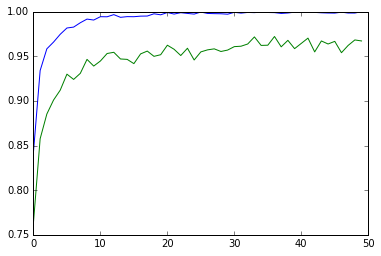

In [26]:
epochs = np.arange(50)
plt.figure()
plt.plot(epochs, training_accuracy_list)
plt.plot(epochs, validation_accuracy_list)
plt.show()

In [27]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_accuracy = evaluate(X_train_gray1, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid_gray1, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))    
    
    test_accuracy = evaluate(X_test_gray1, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet9
Train Accuracy = 1.000
Valid Accuracy = 0.968
Test Accuracy = 0.956


### Predict the Sign Type for Each Image

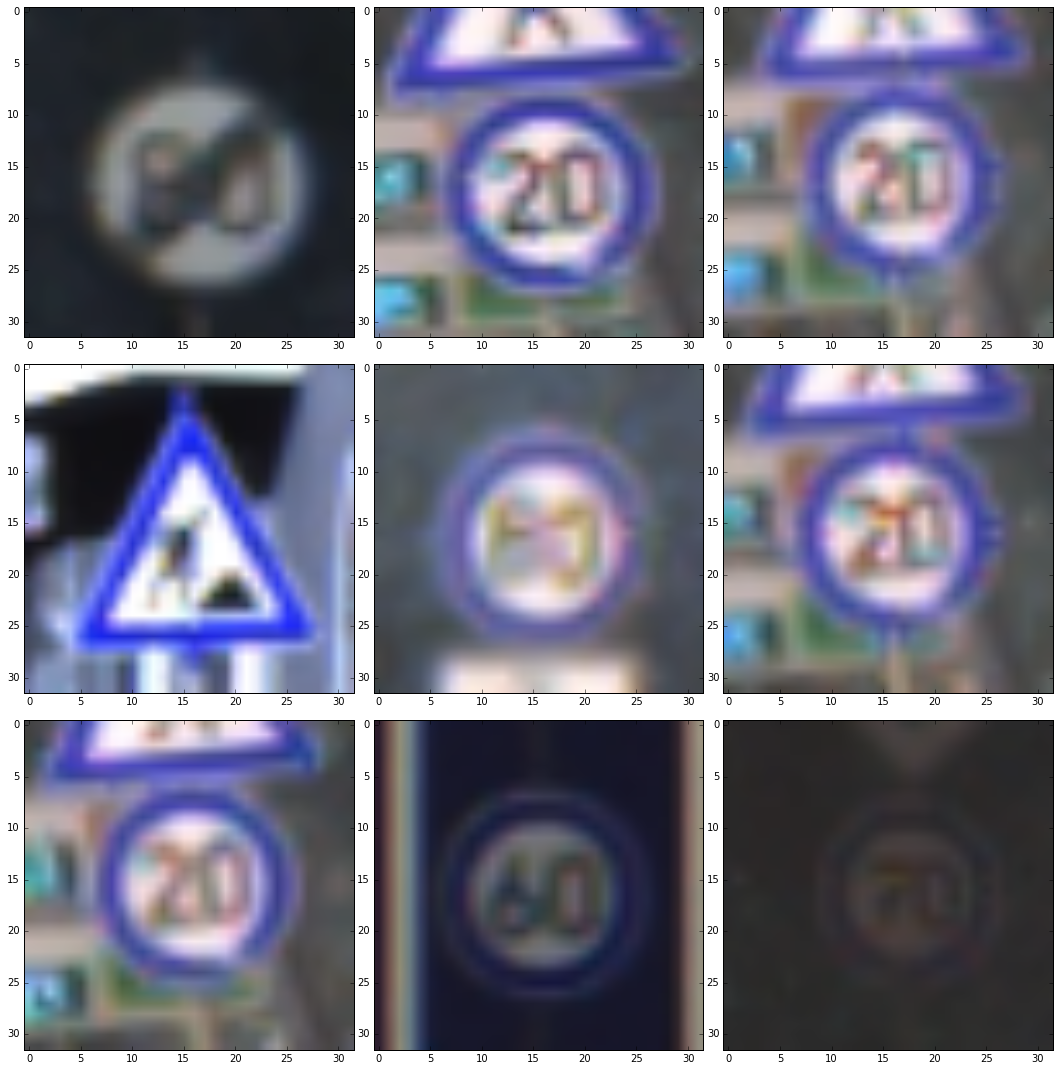

In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import os

IMG_FOLDER = "./samples/"
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

image_list = load_images_from_folder(IMG_FOLDER)
new_img_list = []

f, axarr = plt.subplots(3, 3, figsize = (15,15))
plt.subplots_adjust(wspace=0.2, hspace=0.5)


count = 0
for image in image_list:
    i = int(count / 3)
    j = int(count % 3)
    image = cv2.resize(image, (32, 32)) 
    new_img_list.append(image)
    axarr[i, j].imshow(image)
    count += 1

plt.tight_layout()
plt.show()

### Analyze Performance

In [29]:
### Calculate the accuracy for these 9 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

X_stern_test = np.array([img for img in new_img_list])
y_stern_test = [5, 0, 0, 25, 3, 0, 0, 3, 4]
print("X_stern_test.shape = " + str(X_stern_test.shape))

X_stern_test_gray =  np.zeros((len(y_stern_test), 32, 32, 1))
X_stern_test_gray1 =  np.zeros((len(y_stern_test), 32, 32, 1))

for i in range(len(y_stern_test)):
    X_stern_test_gray[i, :, :, 0] = process_image(X_stern_test[i].squeeze())
    X_stern_test_gray1[i, :, :, 0] = normalize_image2(X_stern_test_gray[i, :, :, 0])

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    stern_test_accuracy = evaluate(X_stern_test_gray1, y_stern_test)
    print("Stern Test Accuracy = {:.3f}".format(stern_test_accuracy))
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_stern_test_gray1, keep_prob: 1.0})
    top_5_prob = tf.nn.top_k(prob, k=5)
    top_5_prob_values = sess.run(top_5_prob.values)
    top_5_prob_indices = sess.run(top_5_prob.indices)
    print("top_5_prob_values " + str(top_5_prob_values.shape))
    print("top_5_prob_indices " + str(top_5_prob_indices.shape))

X_stern_test.shape = (9, 32, 32, 3)
INFO:tensorflow:Restoring parameters from ./lenet9
Stern Test Accuracy = 0.778
top_5_prob_values (9, 5)
top_5_prob_indices (9, 5)


## Performance

It can be observed that the model got two of the images incorrect. First, it mis-classified speed limit 80 kmph as end speed limit 80 kmph. Second, it mis-classified a blurry 60 kmph sign as 80 kmph

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

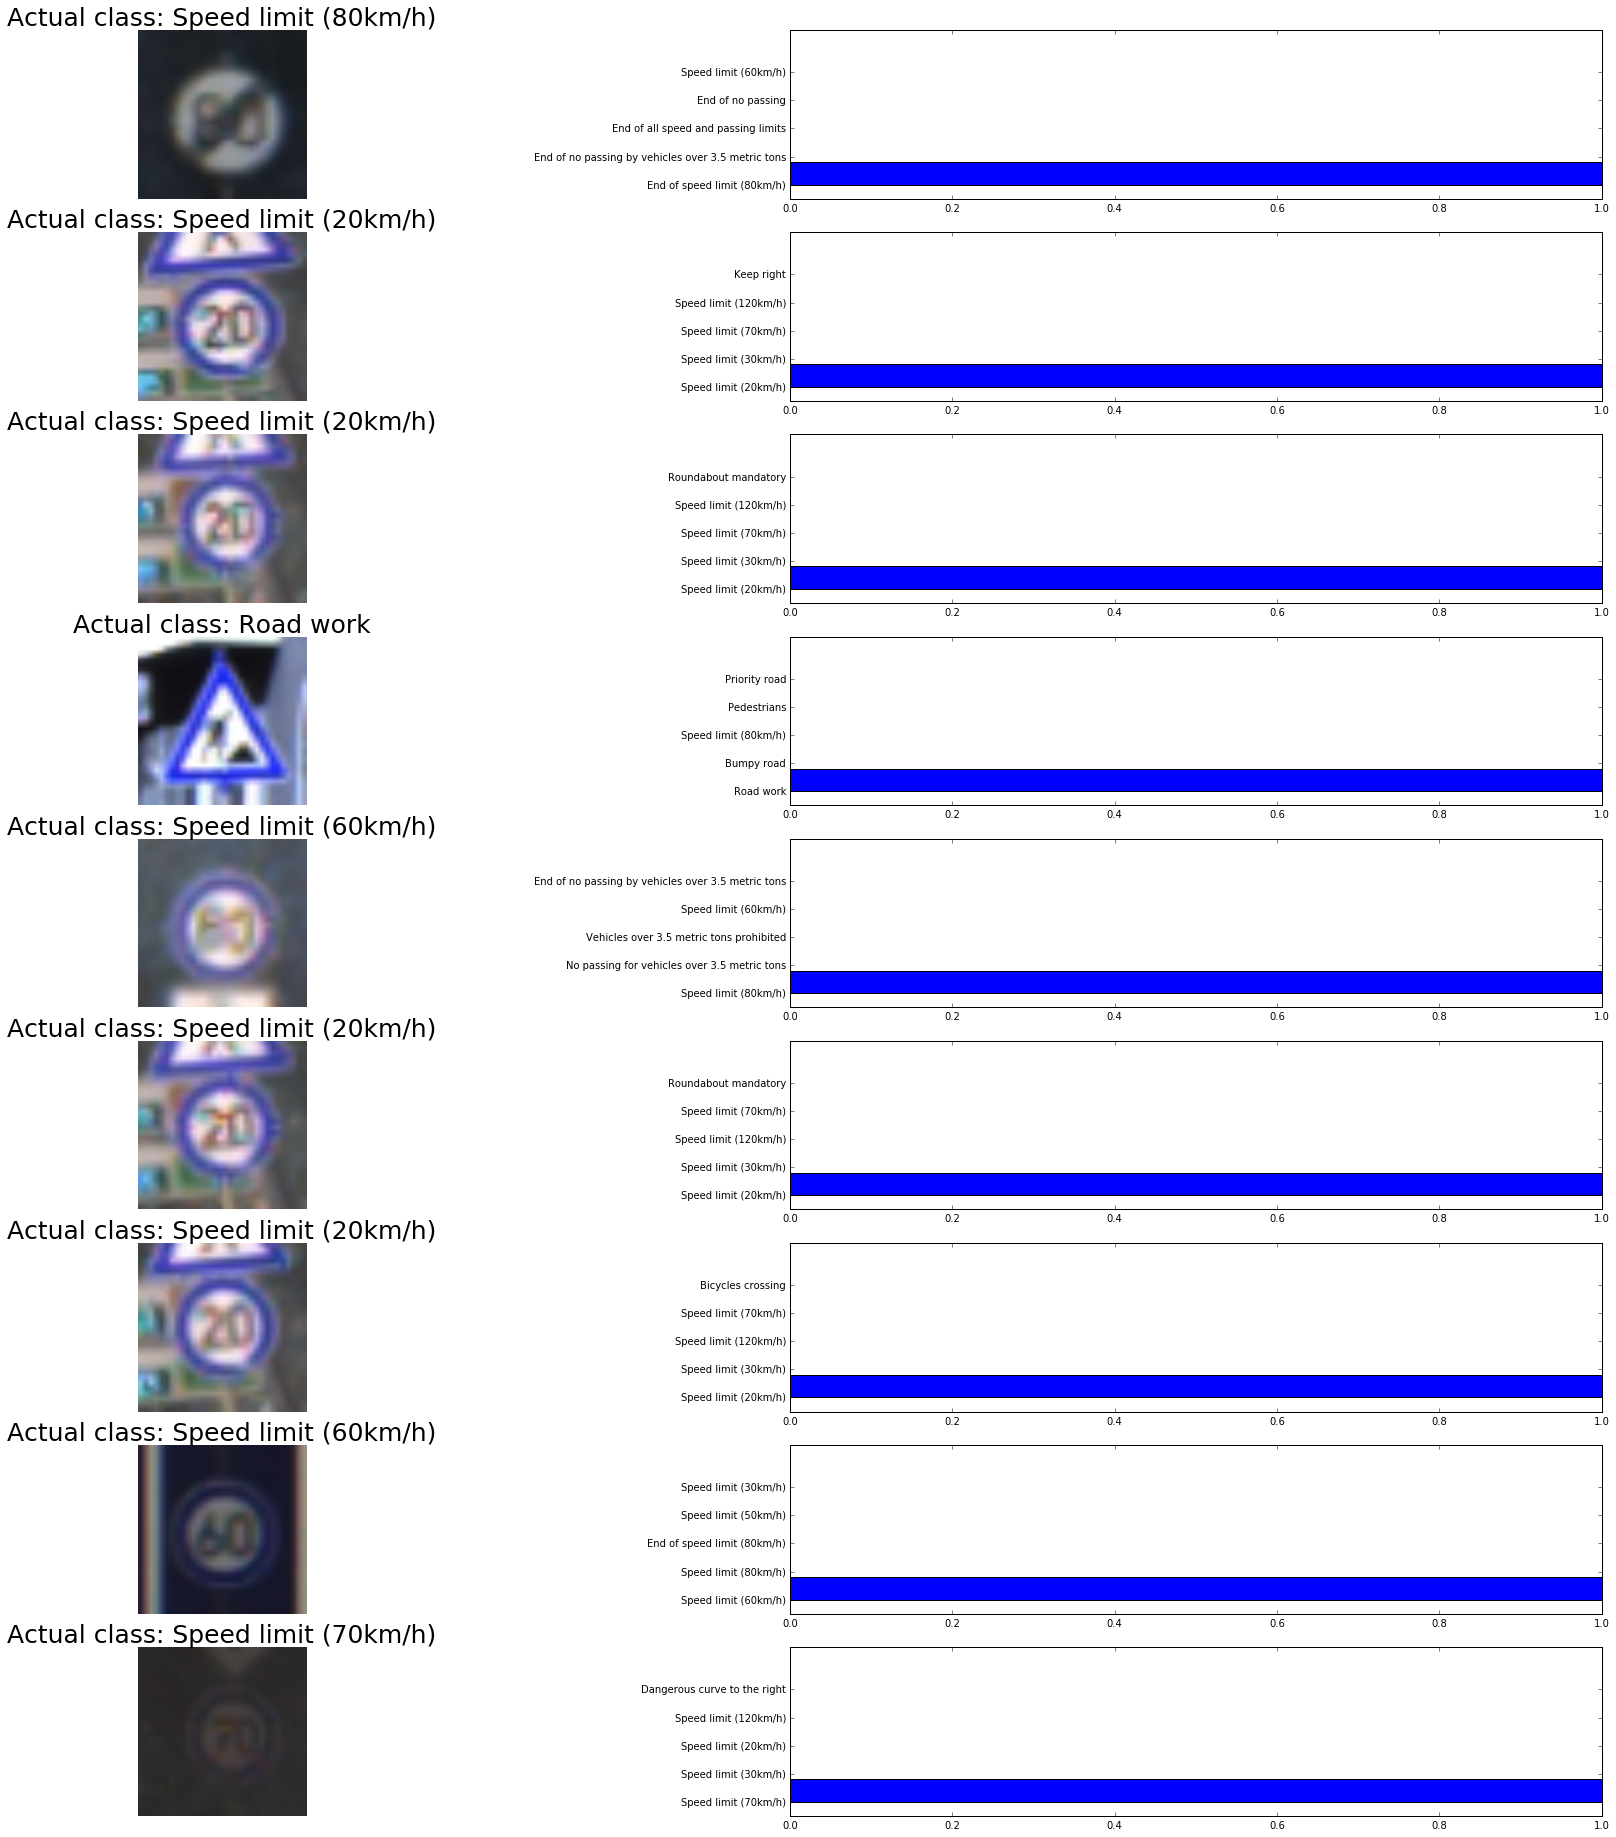

In [31]:
plt.figure(figsize=(32, 32))
for i in range(9):
    plt.subplot(9, 2, 2*i+1)
    plt.imshow(X_stern_test[i]) 
    plt.title("Actual class: " + sign_name_dict[y_stern_test[i]], fontsize = 25)
    plt.axis('off')
    plt.subplot(9, 2, 2*i+2)
    pos = np.arange(5)+.5
    plt.barh(pos, top_5_prob_values[i, :])
    labels = [sign_name_dict[j] for j in top_5_prob_indices[i]]
    plt.yticks(pos, labels)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [32]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [33]:
def VisNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #outputFeatureMap(image, conv1, activation_min=-1, activation_max=-1 ,plt_num=1)
    

    # Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)
    #outputFeatureMap(image, conv1, activation_min=-1, activation_max=-1 ,plt_num=1)

    # Pooling.
    conv2 = tf.nn.dropout(conv2, dropout)
    #conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 3: Convolutional. Output = 10x10x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(2, 2, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    #outputFeatureMap(image, conv1, activation_min=-1, activation_max=-1 ,plt_num=1)

    # Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 10x10x128. Output = 5x5x128.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3 = tf.nn.dropout(conv3, dropout)
    #outputFeatureMap(image, conv3, activation_min=-1, activation_max=-1 ,plt_num=1)

    # Flatten. Input = 5x5x128. Output = 1024.
    fc0   = flatten(conv3)

    # Layer 4: Fully Connected. Input = 2048. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1    = tf.nn.relu(fc1)
    #outputFeatureMap(new_img_list[3], fc1, activation_min=-1, activation_max=-1 ,plt_num=1)

    # Layer 5: Fully Connected. Input = 1024. Output = 512.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 6: Fully Connected. Input = 512. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    layers = [conv1, conv2, conv3, fc1, fc2]
    output = [layers, logits]

    return output

In [107]:
X_image.shape

(1, 32, 32, 3)

In [36]:

processed_image = process_image(new_img_list[0])
processed_image = processed_image.reshape((32, 32, 1))
sample_img_list = [processed_image]

X_image = np.array([img for img in sample_img_list])
y_image = [5]

x = tf.placeholder(tf.float32, (1, 32, 32, 1))
y = tf.placeholder(tf.int32, (43))
one_hot_y = tf.one_hot(y, 1)

print("Shape of processed_image = " + str(processed_image.shape))

layers, logits = VisNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_image)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X, y = shuffle(X_image, y_image)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X[offset:end], y[offset:end]
            print("batch_x shape = " + batch_x.shape)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})


Shape of processed_image = (32, 32, 1)


ValueError: Dimension 0 in both shapes must be equal, but are 1 and 43 for 'SoftmaxCrossEntropyWithLogits_3' (op: 'SoftmaxCrossEntropyWithLogits') with input shapes: [1,43], [43,1].